In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ts = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")
ts = ts.sort_index()

In [7]:
ts_lagged = ts.shift()

In [8]:
ts.head()

,daily worker count
date,
2013-01-02,4
2013-01-03,4
2013-01-04,5
2013-01-05,4
2013-01-06,4


In [9]:
ts_lagged.head()

,daily worker count
date,
2013-01-02,NaN
2013-01-03,4.0
2013-01-04,4.0
2013-01-05,5.0
2013-01-06,4.0


In [10]:
ts_lagged.tail()

,daily worker count
date,
2017-12-03,8125.0
2017-12-04,7790.0
2017-12-05,13161.0
2017-12-06,7955.0
2017-12-07,7785.0


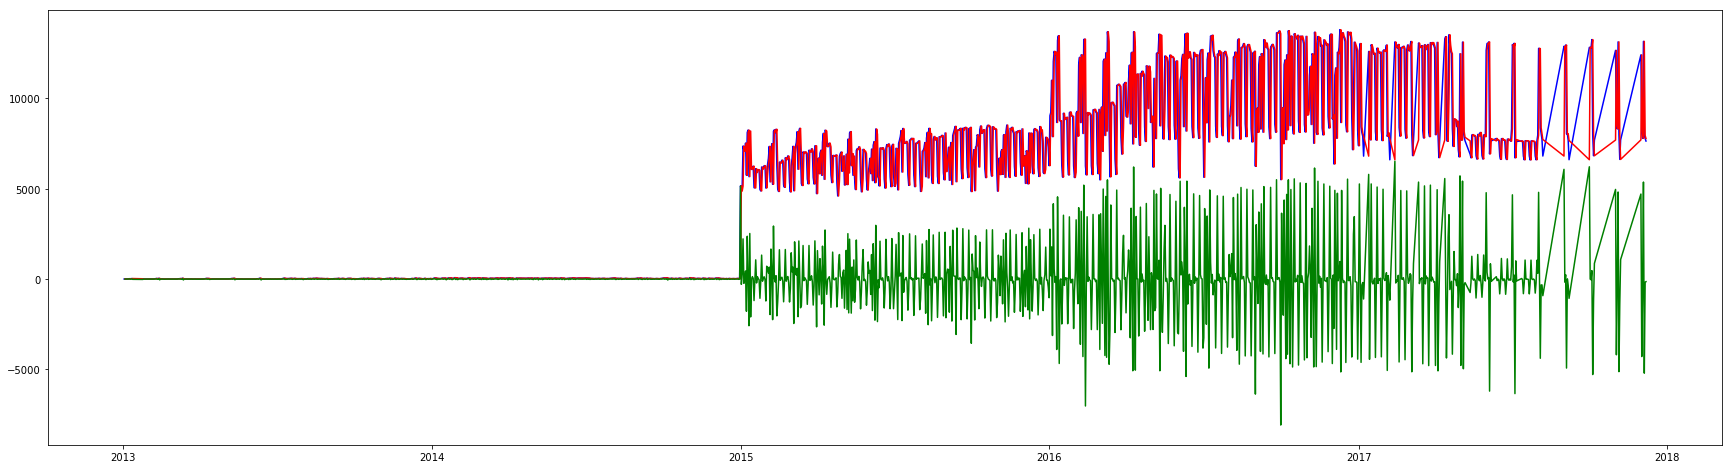

In [14]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 8
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')
plt.plot(ts-ts_lagged, color='green')

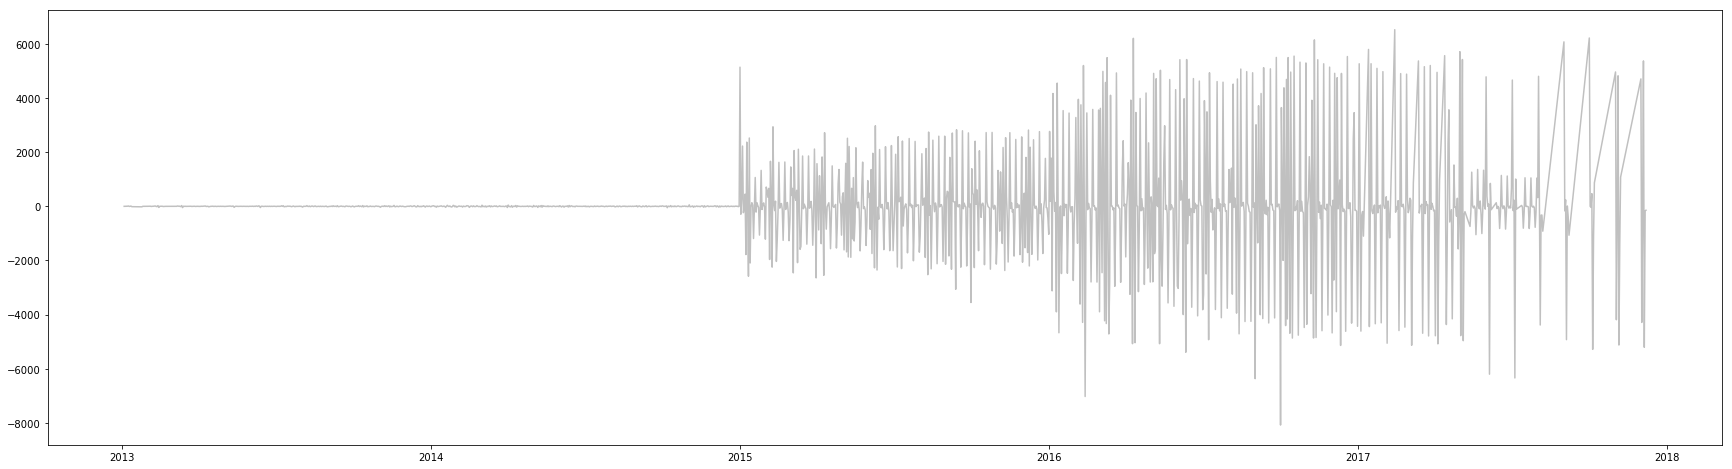

In [15]:
plt.plot(ts.diff(), color='silver')

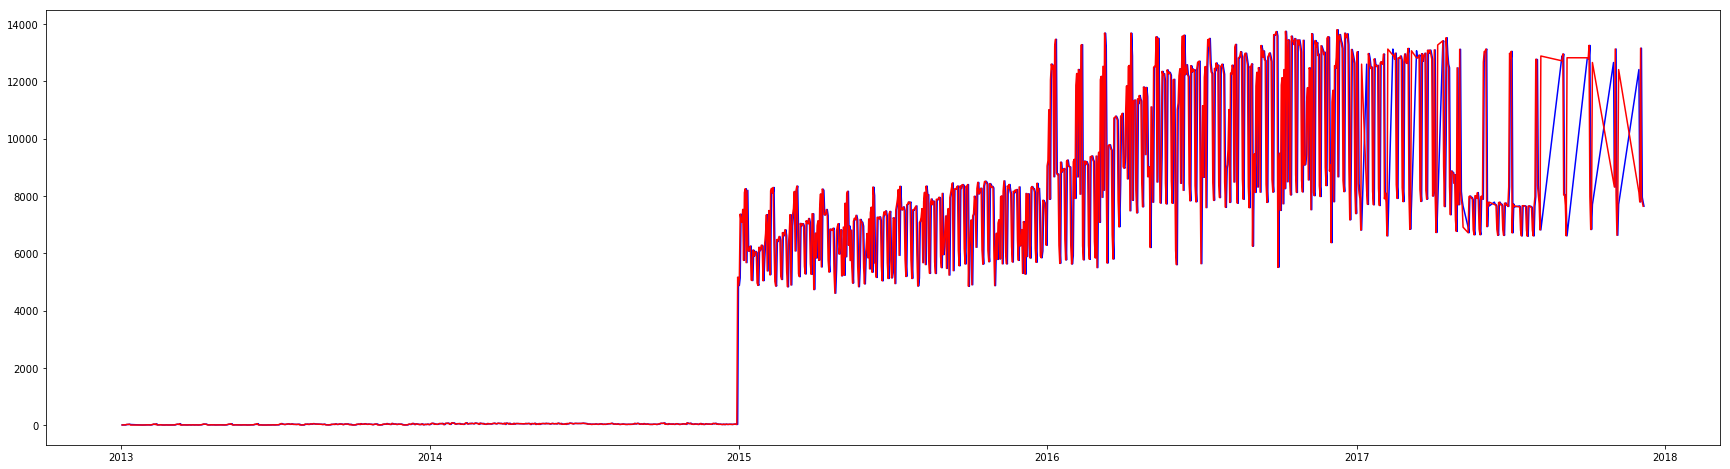

In [16]:
ts_lagged = ts.shift(-1)
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

# Window Functions

In [19]:
dataframe = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")
dataframe = dataframe.sort_index()
dataframe['year'] = dataframe.index.year
dataframe['day_of_month'] = dataframe.index.day
dataframe['month'] = dataframe.index.month
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['quarter'] = dataframe.index.quarter
dataframe['week_of_year'] = dataframe.index.weekofyear

is_weekend = []
for i in dataframe.day_of_week:
    if i >= 5:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
        
dataframe['is_weekend'] = is_weekend

In [21]:
dataframe.columns

Index(['daily worker count', 'year', 'day_of_month', 'month', 'day_of_week',
       'quarter', 'week_of_year', 'is_weekend'],
      dtype='object')

In [29]:
r = dataframe.rolling(window=5)
r

Rolling [window=5,center=False,axis=0]

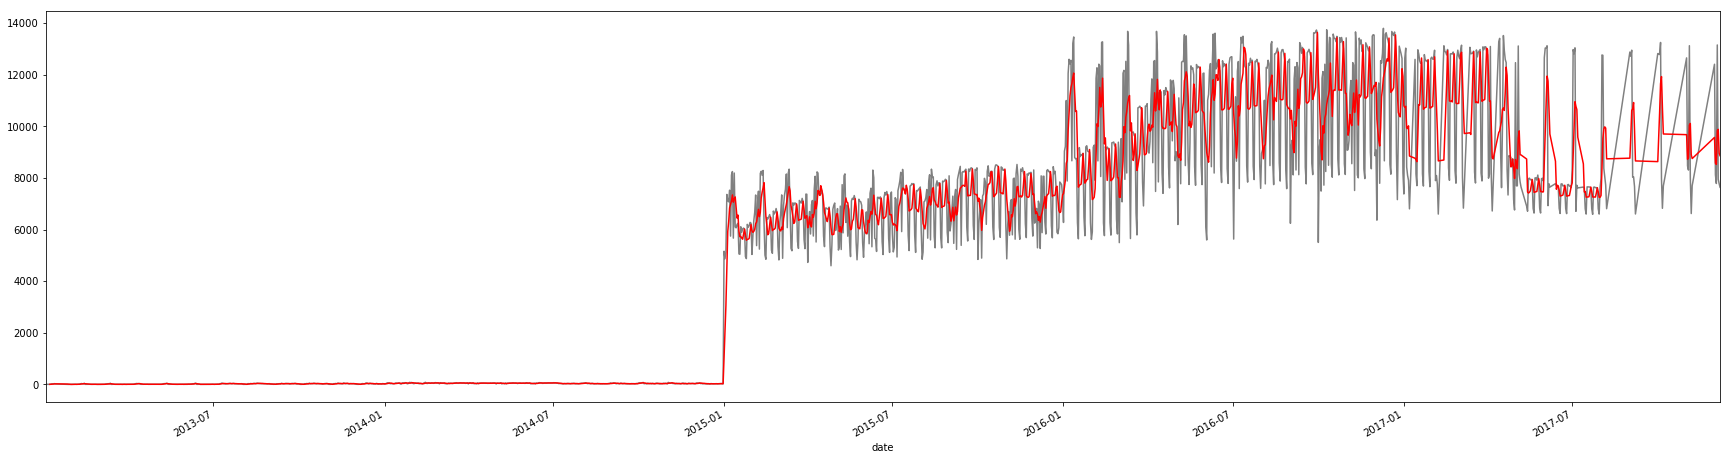

In [30]:
dataframe['daily worker count'].plot(color='gray')
r.mean()['daily worker count'].plot(color='red')

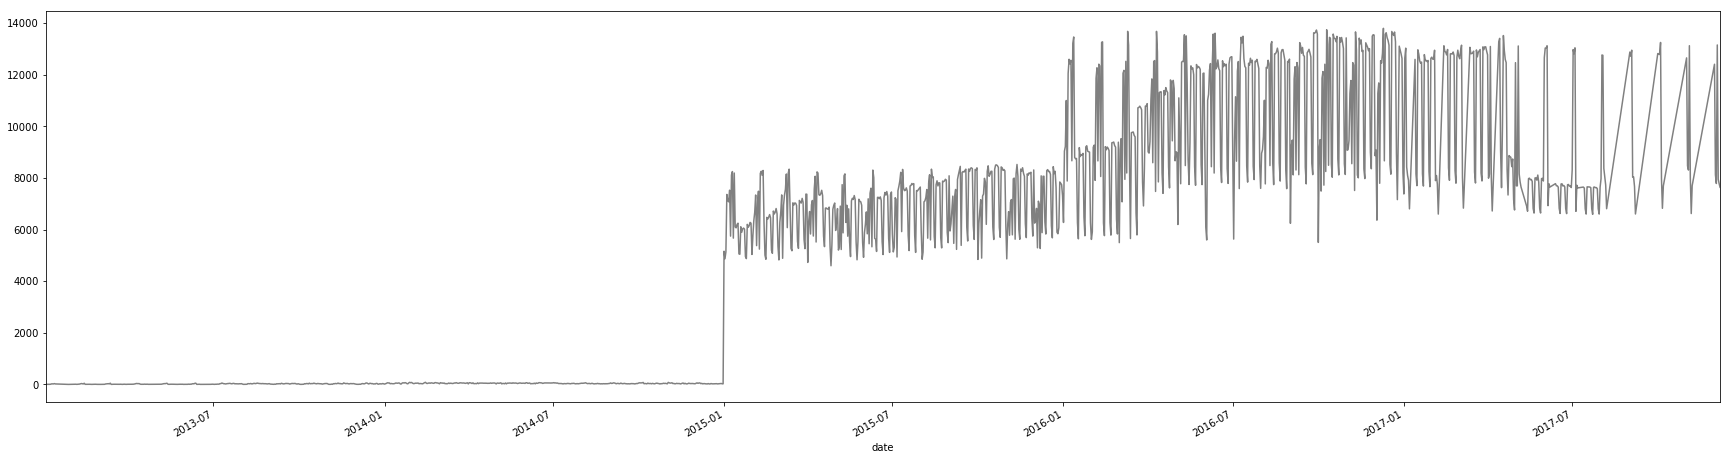

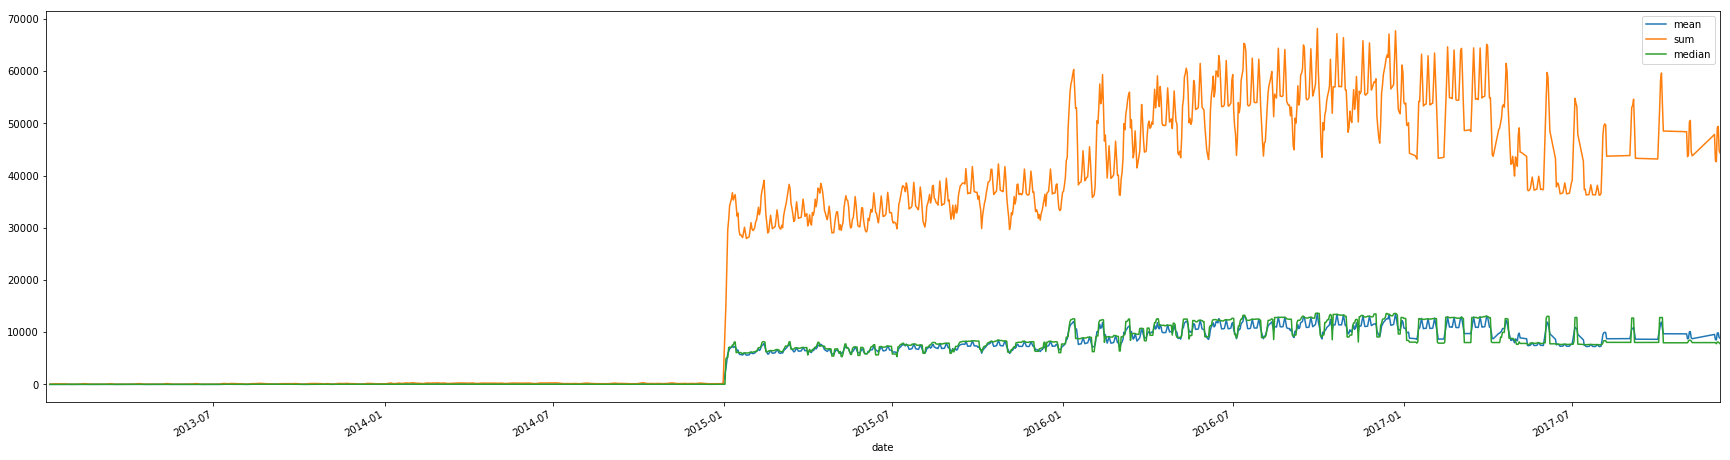

In [56]:
dataframe['daily worker count'].plot(color='gray')
r.agg(['mean','sum','median'])['daily worker count'].plot()

# Expanding Windows

In [39]:
dataframe.expanding(min_periods=1).mean()[1:5]

,daily worker count,year,day_of_month,month,day_of_week,quarter,week_of_year,is_weekend
date,,,,,,,,
2013-01-03,4.000000,2013.0,2.5,1.0,2.5,1.0,1.0,0.00
2013-01-04,4.333333,2013.0,3.0,1.0,3.0,1.0,1.0,0.00
2013-01-05,4.250000,2013.0,3.5,1.0,3.5,1.0,1.0,0.25
2013-01-06,4.200000,2013.0,4.0,1.0,4.0,1.0,1.0,0.40


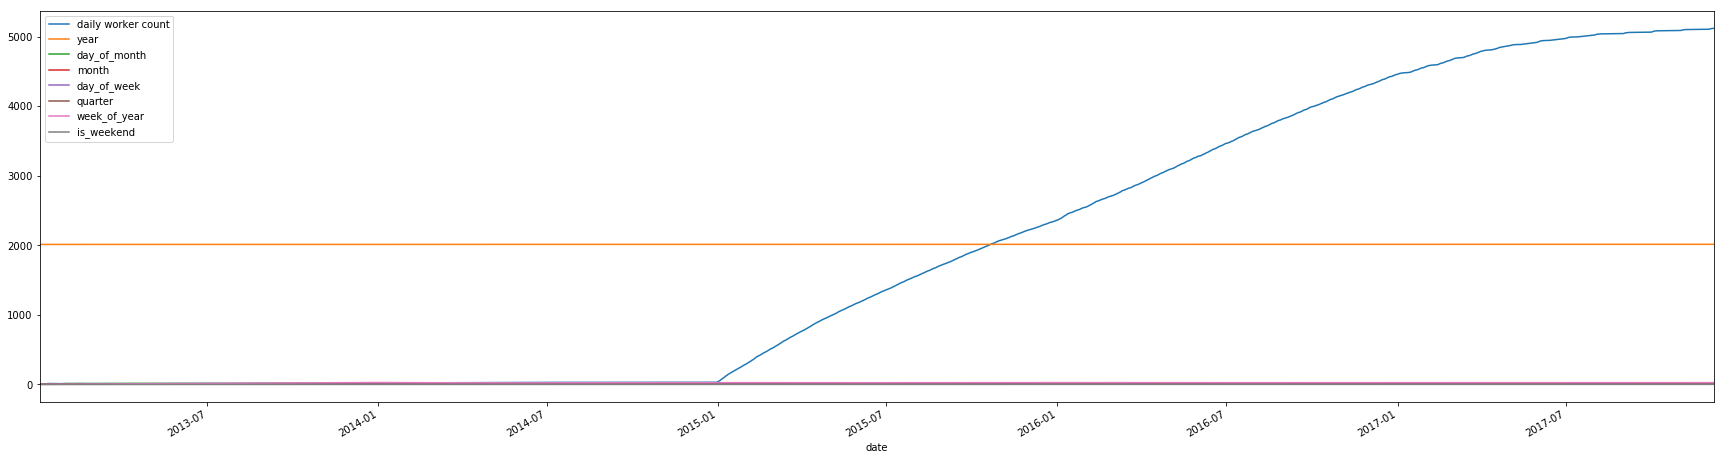

In [40]:
dataframe.expanding(min_periods=1).mean().plot()

In [41]:
ts = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")

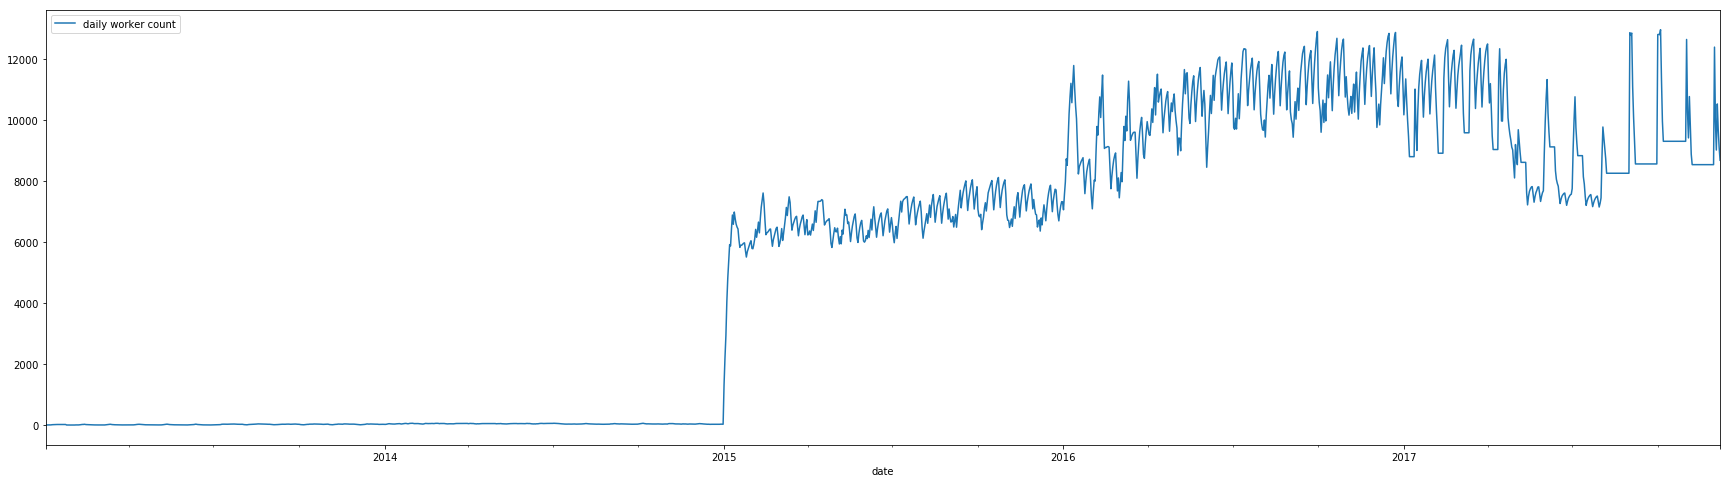

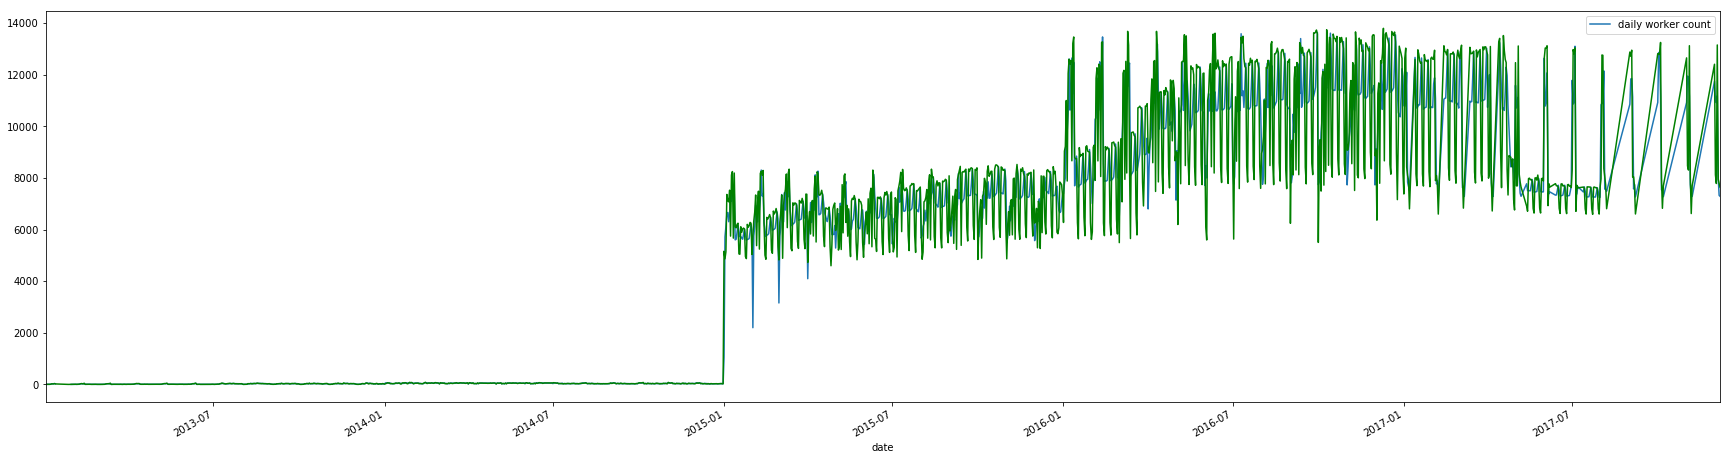

In [53]:
ts.ewm(span=7, freq='D',min_periods=0, adjust=True).mean().plot()
ts.rolling(window=5).mean().plot()
ts['daily worker count'].plot(color='green')